### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Introduction**: explaining the problem and the key concepts.
- **Excercise 05.01**: Simulations of the Ising model with Metropolis and Gibbs Sampling

## Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_05.1' the command :  `make`. 
- To automatically execute the code run :  `make run`.
- To clear the files `.o`  please run `make clean`.
- The code generates output files in two main directories:  
    - 'output1' containing the output relative to the simulation with starting point (0,0,1)
    - 'output2'containing the output relative to the simulation with starting point (0,0,20)

## Introduction

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy import table
from astropy.io import ascii

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$


## Exercise 05.1

We aim to employ the Metropolis algorithm for sampling $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ in Cartesian coordinates. Initially, we use a uniform transition probability $T(\vec{x}|\vec{y})$, and subsequently, a Gaussian transition probability. Our goal is to utilize the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$.

Our experimental setup involves:
- $100$ blocks
- $10^5$ throws for each block

During our trials, we determined suitable step lengths, denoted as $s$, for different scenarios to achieve an approximate acceptance probability of 50%. The selected values are as follows

For the uniform probability: $T(x)\sim \text{unif}(x-s,x+s)$
$$
s=
\begin{cases}
1.2 & \text{for }&\psi_{1,0,0}\\
2.9 & \text{for }&\psi_{2,1,0}
\end{cases}
$$

For the normal probability: $T(x)\sim \mathcal{N}(x,s)$
$$
s=
\begin{cases}
0.7 & \text{for }&\psi_{1,0,0}\\
1.9 & \text{for }&\psi_{2,1,0}
\end{cases}
$$



We also skipped the first $10^5$ steps to equilibrate the sampling before to start measuring the radius, those points are still represented in the scatter plot of the sampled points. 

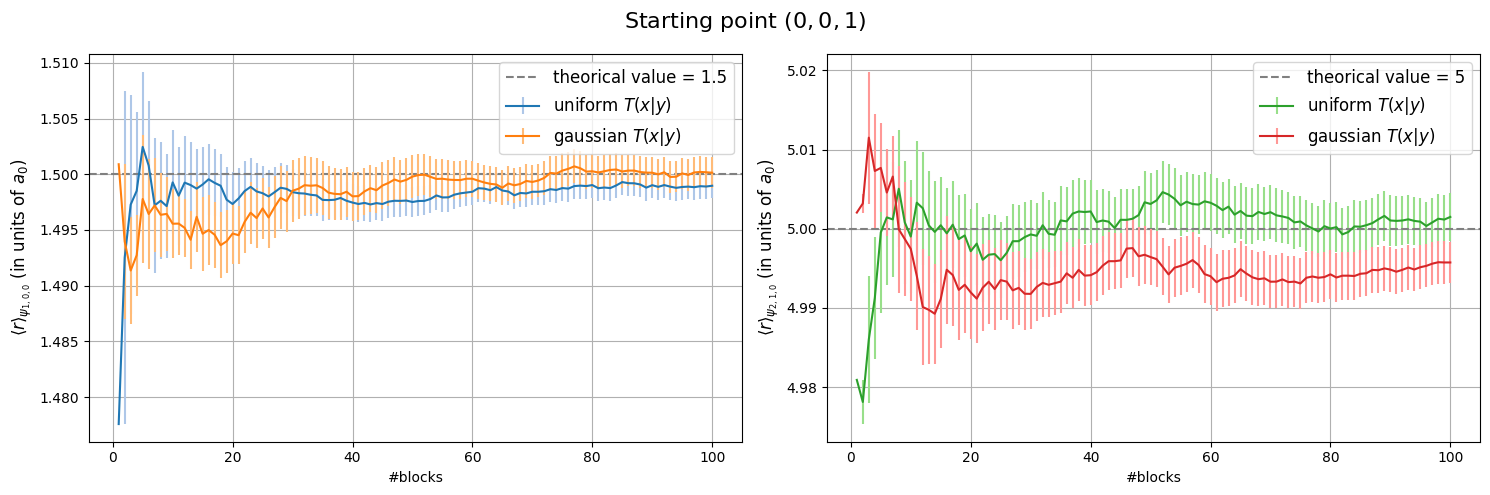

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'psi100_unif': np.loadtxt('es_05.1/output1/psi100_ave_u.dat', skiprows=1),
    'psi100_gauss': np.loadtxt('es_05.1/output1/psi100_ave_g.dat', skiprows=1),
    'psi210_unif': np.loadtxt('es_05.1/output1/psi210_ave_u.dat', skiprows=1),
    'psi210_gauss': np.loadtxt('es_05.1/output1/psi210_ave_g.dat', skiprows=1),
}

quantities = ['psi100_unif', 'psi100_gauss', 'psi210_unif', 'psi210_gauss']

ylabels = [r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$']
labels = [r'uniform $T(x|y)$',r'gaussian $T(x|y)$',r'uniform $T(x|y)$',r'gaussian $T(x|y)$']
cm = plt.get_cmap('tab20')

# Create subplots in a 1x2 grid

plt.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
target=[1.5,5]

for i, quantity in enumerate(quantities):
    idx = i // 2  # Determine the subplot index (0 or 1)
    color = cm(2 * i)
    ecolor = cm(2 * i + 1)
    axs[idx].errorbar(data[quantity][:, 0], data[quantity][:, 1], yerr=data[quantity][:, 2],
                      color=color, ecolor=ecolor, label=labels[i])
    if i%2== 0:
        axs[idx].axhline(y=target[idx], color="grey", linestyle='--', label=f'theorical value = {target[idx]}')
    
    axs[idx].grid(True)
    axs[idx].legend(fontsize=12)
    axs[idx].set_ylabel(ylabels[i]+' (in units of $a_0$)', fontsize=12)
    axs[idx].set_xlabel("#blocks", fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=10)
    axs[idx].tick_params(axis='both', which='minor', labelsize=10)

# Set titles
fig.suptitle("Starting point $(0,0,1)$", fontsize=16)

# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()



There does not appear to be a statistically significant difference between employing Gaussian or uniform sampling for the transition. However, in the case of the excited state, uniform sampling emerges as the preferred choice, as the Gaussian approach produces a result that falls outside the realm of compatibility with the expected value within the associated uncertainty.

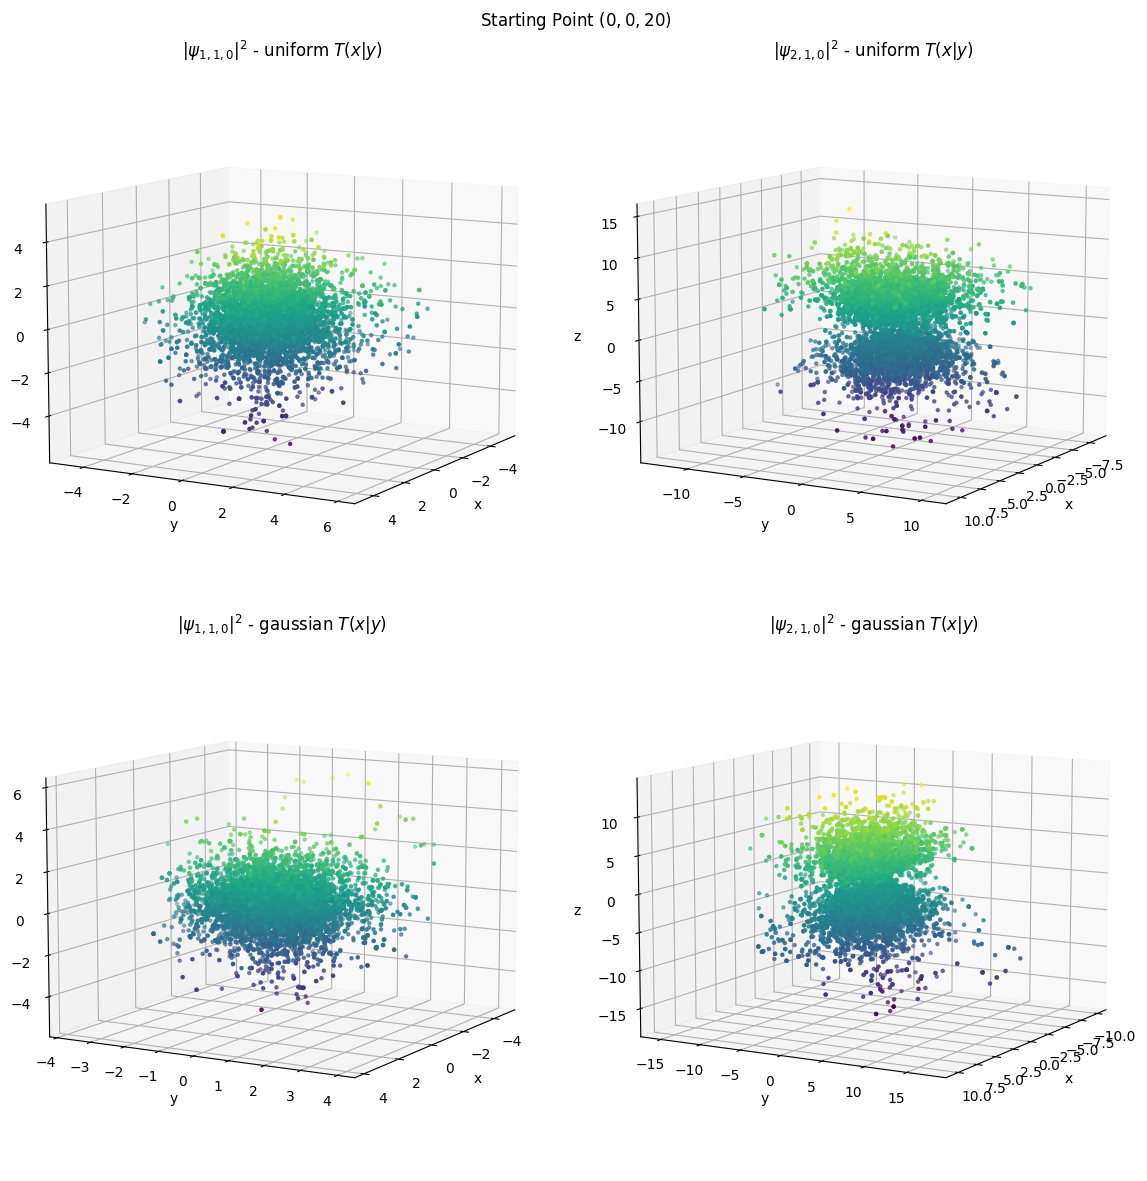

In [10]:
import matplotlib.pyplot as plt
import numpy as np

M = 10000
data_paths = [
    ('es_05.1/output1/psi100_x_u.dat', " $|\psi_{1,1,0}|^2$ - uniform $T(x|y)$"),
    ('es_05.1/output1/psi210_x_u.dat', " $|\psi_{2,1,0}|^2$ - uniform $T(x|y)$"),
    ('es_05.1/output1/psi100_x_g.dat', " $|\psi_{1,1,0}|^2$ - gaussian $T(x|y)$"),
    ('es_05.1/output1/psi210_x_g.dat', " $|\psi_{2,1,0}|^2$ - gaussian $T(x|y)$")
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': '3d'})
axs = axs.ravel()

for i, (data_path, title) in enumerate(data_paths):
    data = np.loadtxt(data_path, skiprows=1, usecols=(0, 1, 2))[:M]
    X, Y, Z = data[:, 0], data[:, 1], data[:, 2]

    ax = axs[i]
    ax.scatter(X, Y, Z, c=Z, marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    ax.set_title(title)

plt.suptitle("Starting Point $(0, 0, 1)$")
plt.tight_layout()
plt.show()


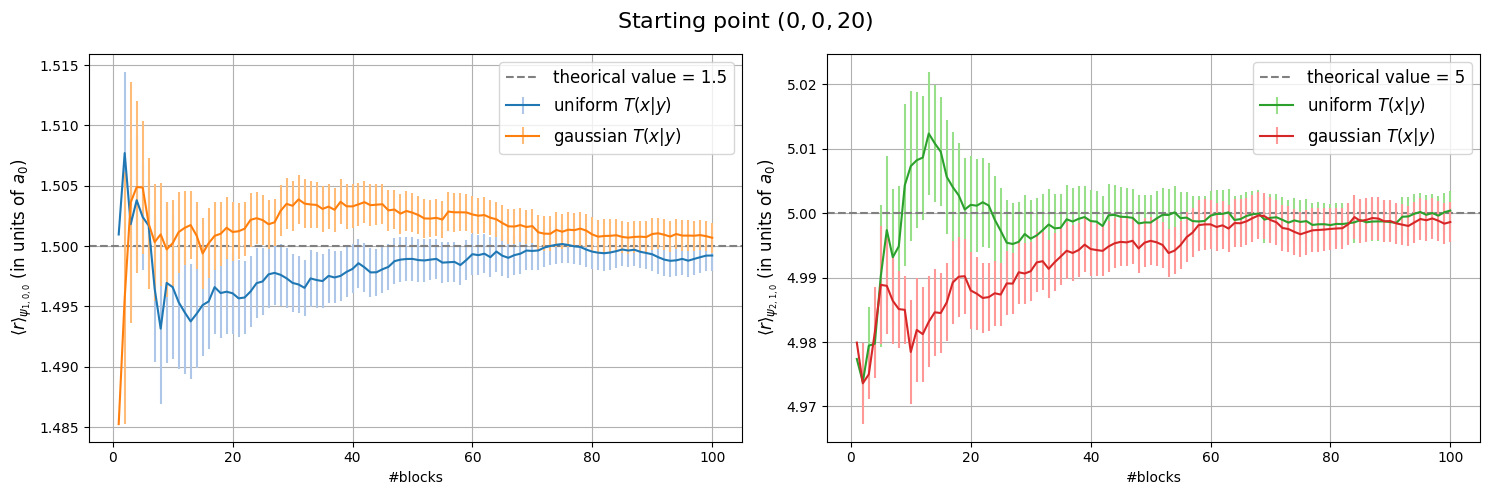

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'psi100_unif': np.loadtxt('es_05.1/output2/psi100_ave_u.dat', skiprows=1),
    'psi100_gauss': np.loadtxt('es_05.1/output2/psi100_ave_g.dat', skiprows=1),
    'psi210_unif': np.loadtxt('es_05.1/output2/psi210_ave_u.dat', skiprows=1),
    'psi210_gauss': np.loadtxt('es_05.1/output2/psi210_ave_g.dat', skiprows=1),
}

quantities = ['psi100_unif', 'psi100_gauss', 'psi210_unif', 'psi210_gauss']
target=[1.5,5]
ylabels = [r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$']
labels = [r'uniform $T(x|y)$',r'gaussian $T(x|y)$',r'uniform $T(x|y)$',r'gaussian $T(x|y)$']
cm = plt.get_cmap('tab20')

# Create subplots in a 1x2 grid

plt.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, quantity in enumerate(quantities):
    idx = i // 2  # Determine the subplot index (0 or 1)
    color = cm(2 * i)
    ecolor = cm(2 * i + 1)
    axs[idx].errorbar(data[quantity][:, 0], data[quantity][:, 1], yerr=data[quantity][:, 2],
                      color=color, ecolor=ecolor, label=labels[i])
    if i%2== 0:
        axs[idx].axhline(y=target[idx], color="grey", linestyle='--', label=f'theorical value = {target[idx]}')
    
    axs[idx].grid(True)
    axs[idx].legend(fontsize=12)
    axs[idx].set_ylabel(ylabels[i]+' (in units of $a_0$)', fontsize=12)
    axs[idx].set_xlabel("#blocks", fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=10)
    axs[idx].tick_params(axis='both', which='minor', labelsize=10)


# Set titles
fig.suptitle("Starting point $(0,0,20)$", fontsize=16)
# Adjust subplot spacing
fig.tight_layout()
# Show the plot
plt.show()

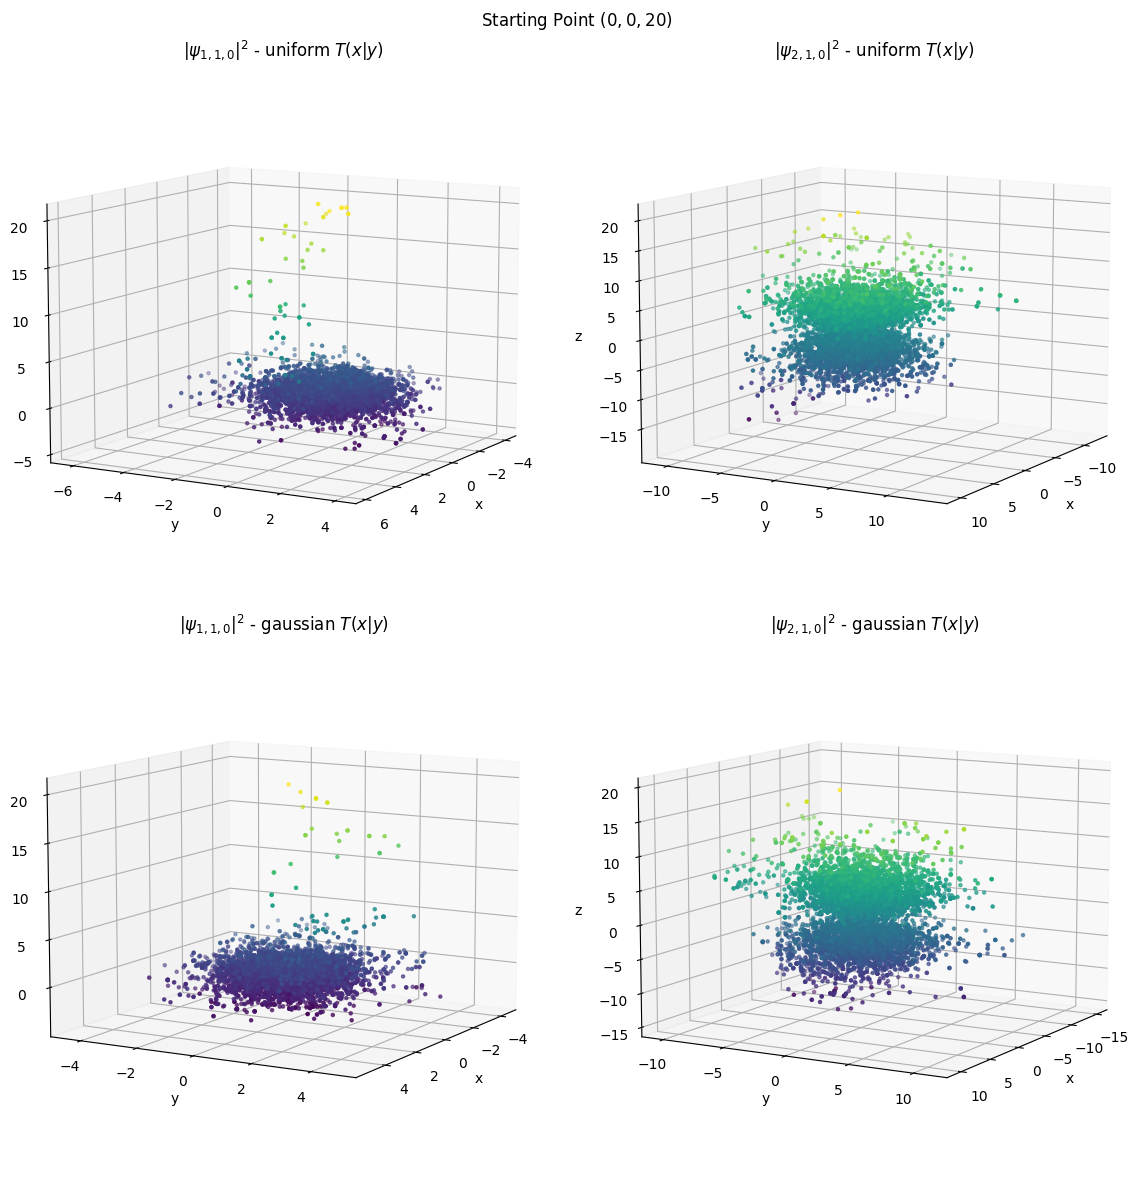

In [9]:
import matplotlib.pyplot as plt
import numpy as np



M = 10000
data_paths = [
    ('es_05.1/output2/psi100_x_u.dat', " $|\psi_{1,1,0}|^2$ - uniform $T(x|y)$"),
    ('es_05.1/output2/psi210_x_u.dat', " $|\psi_{2,1,0}|^2$ - uniform $T(x|y)$"),
    ('es_05.1/output2/psi100_x_g.dat', " $|\psi_{1,1,0}|^2$ - gaussian $T(x|y)$"),
    ('es_05.1/output2/psi210_x_g.dat', " $|\psi_{2,1,0}|^2$ - gaussian $T(x|y)$")
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': '3d'})
axs = axs.ravel()

for i, (data_path, title) in enumerate(data_paths):
    data = np.loadtxt(data_path, skiprows=1, usecols=(0, 1, 2))[:M]
    X, Y, Z = data[:, 0], data[:, 1], data[:, 2]

    ax = axs[i]
    ax.scatter(X, Y, Z, c=Z, marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    ax.set_title(title)

plt.suptitle("Starting Point $(0, 0, 20)$")
plt.tight_layout()
plt.show()


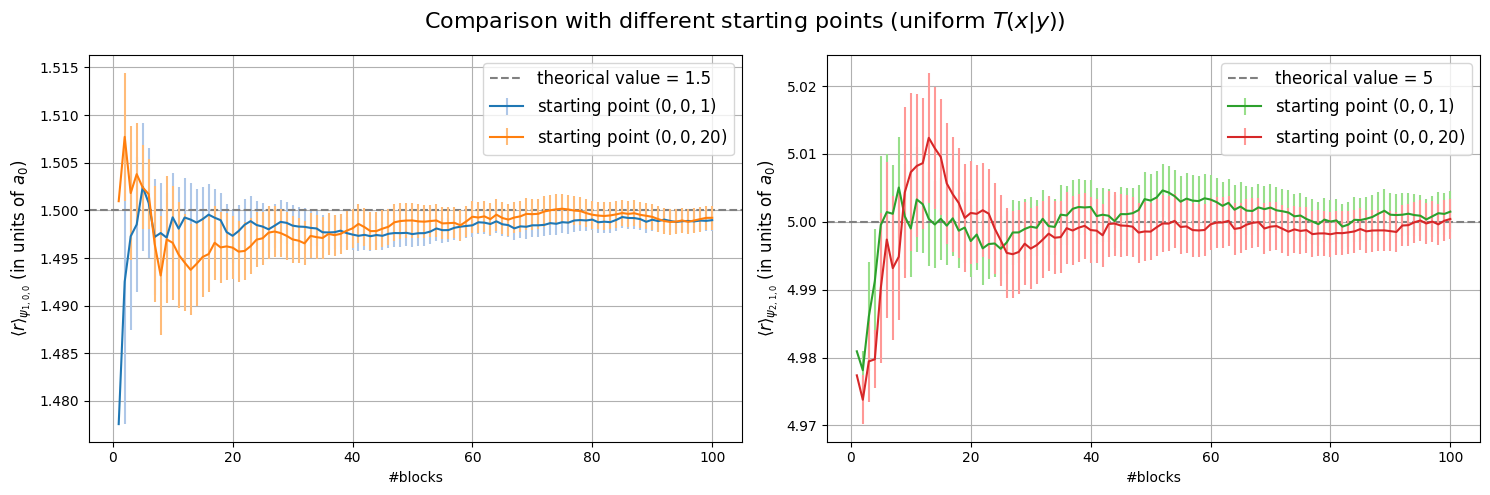

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'psi100_1': np.loadtxt('es_05.1/output1/psi100_ave_u.dat', skiprows=1),
    'psi100_20': np.loadtxt('es_05.1/output2/psi100_ave_u.dat', skiprows=1),
    'psi210_1': np.loadtxt('es_05.1/output1/psi210_ave_u.dat', skiprows=1),
    'psi210_20': np.loadtxt('es_05.1/output2/psi210_ave_u.dat', skiprows=1),
}

quantities = ['psi100_1', 'psi100_20', 'psi210_1', 'psi210_20']
target=[1.5,5]
ylabels = [r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$']
labels = [r'starting point $(0,0,1)$',r'starting point $(0,0,20)$',r'starting point $(0,0,1)$',r'starting point $(0,0,20)$']
cm = plt.get_cmap('tab20')

# Create subplots in a 1x2 grid

plt.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, quantity in enumerate(quantities):
    idx = i // 2  # Determine the subplot index (0 or 1)
    color = cm(2 * i)
    ecolor = cm(2 * i + 1)
    axs[idx].errorbar(data[quantity][:, 0], data[quantity][:, 1], yerr=data[quantity][:, 2],
                      color=color, ecolor=ecolor, label=labels[i])
    if i%2== 0:
        axs[idx].axhline(y=target[idx], color="grey", linestyle='--', label=f'theorical value = {target[idx]}')
    
    axs[idx].grid(True)
    axs[idx].legend(fontsize=12)
    axs[idx].set_ylabel(ylabels[i]+' (in units of $a_0$)', fontsize=12)
    axs[idx].set_xlabel("#blocks", fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=10)
    axs[idx].tick_params(axis='both', which='minor', labelsize=10)


# Set titles
fig.suptitle("Comparison with different starting points (uniform $T(x|y)$)", fontsize=16)
# Adjust subplot spacing
fig.tight_layout()
# Show the plot
plt.show()

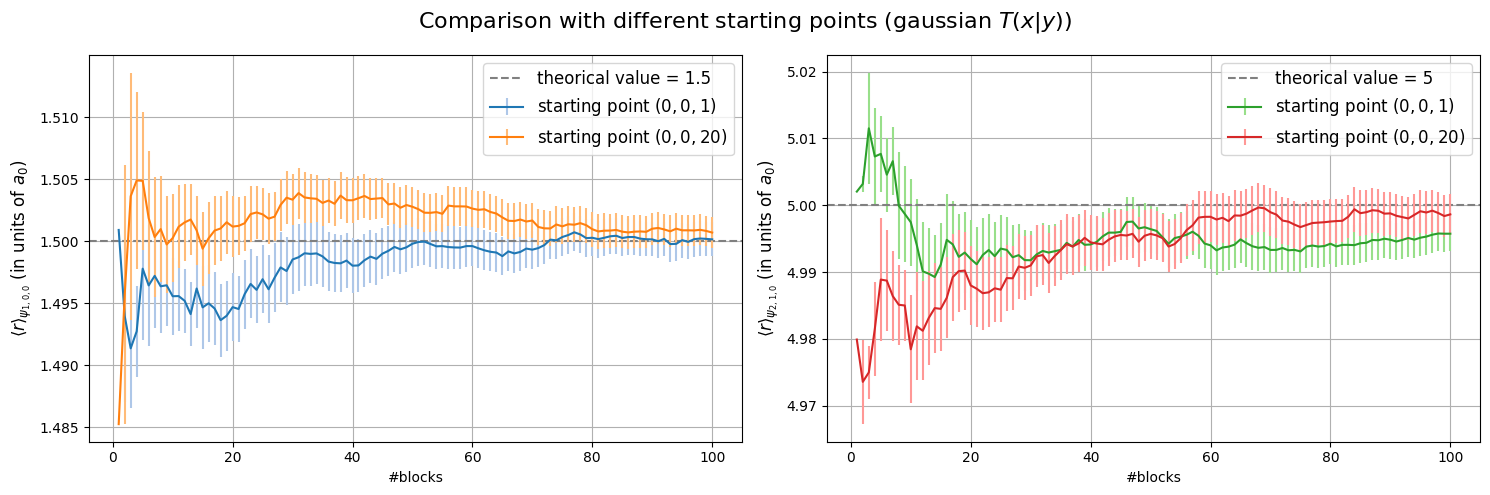

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'psi100_1': np.loadtxt('es_05.1/output1/psi100_ave_g.dat', skiprows=1),
    'psi100_20': np.loadtxt('es_05.1/output2/psi100_ave_g.dat', skiprows=1),
    'psi210_1': np.loadtxt('es_05.1/output1/psi210_ave_g.dat', skiprows=1),
    'psi210_20': np.loadtxt('es_05.1/output2/psi210_ave_g.dat', skiprows=1),
}

quantities = ['psi100_1', 'psi100_20', 'psi210_1', 'psi210_20']
target=[1.5,5]
ylabels = [r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{1,0,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$', r'$\langle r \rangle_{\psi_{2,1,0}}$']
labels = [r'starting point $(0,0,1)$',r'starting point $(0,0,20)$',r'starting point $(0,0,1)$',r'starting point $(0,0,20)$']
cm = plt.get_cmap('tab20')

# Create subplots in a 1x2 grid

plt.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, quantity in enumerate(quantities):
    idx = i // 2  # Determine the subplot index (0 or 1)
    color = cm(2 * i)
    ecolor = cm(2 * i + 1)
    axs[idx].errorbar(data[quantity][:, 0], data[quantity][:, 1], yerr=data[quantity][:, 2],
                      color=color, ecolor=ecolor, label=labels[i])
    if i%2== 0:
        axs[idx].axhline(y=target[idx], color="grey", linestyle='--', label=f'theorical value = {target[idx]}')
    
    axs[idx].grid(True)
    axs[idx].legend(fontsize=12)
    axs[idx].set_ylabel(ylabels[i]+' (in units of $a_0$)', fontsize=12)
    axs[idx].set_xlabel("#blocks", fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=10)
    axs[idx].tick_params(axis='both', which='minor', labelsize=10)


# Set titles
fig.suptitle("Comparison with different starting points (gaussian $T(x|y)$)", fontsize=16)
# Adjust subplot spacing
fig.tight_layout()
# Show the plot
plt.show()

The selection of an initial point that is more distant from the origin does not preclude the algorithm from ultimately converging to the correct result. However, it necessitates a greater number of steps for the algorithm to approach the anticipated value. This prolonged trajectory results in increased uncertainties surrounding the final estimation, in accordance with the principles of Monte Carlo simulations and the Metropolis algorithm. The algorithm's ability to navigate the phase space efficiently relies on both the initial point and the transition probability distribution employed.